In [397]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [398]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [399]:
raw_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [400]:
neg, pos = np.bincount(raw_df['Class'])
print(neg, pos)

284315 492


In [401]:
cleaned_df = raw_df.copy()
cleaned_df.pop("Time")
cleaned_df["Log Amount"] = np.log(cleaned_df["Amount"] + 0.001)
cleaned_df.pop("Amount")

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

In [402]:
cleaned_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,0.001727,2.942089
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,2.023685
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-6.907755
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,1.722945
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,3.091088
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,4.345959
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,10.153902


In [403]:
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, valid_df = train_test_split(train_df, test_size=0.2)

train_labels = np.array(train_df.pop("Class"))
valid_labels = np.array(valid_df.pop("Class"))
test_labels  = np.array(test_df.pop("Class"))

train_features = np.array(train_df)
valid_features = np.array(valid_df)
test_features  = np.array(test_df)


In [404]:
scaler = sklearn.preprocessing.StandardScaler()
train_features = scaler.fit_transform(train_features)
valid_features = scaler.transform(valid_features)
test_features = scaler.transform(test_features)

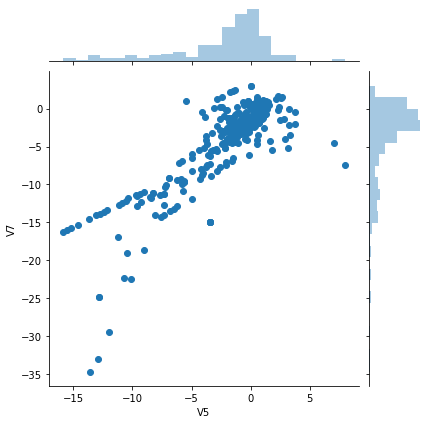

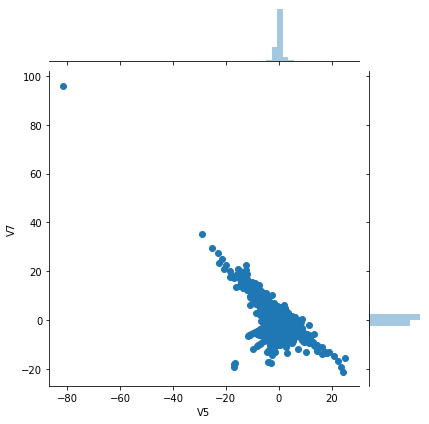

In [405]:
pos_df = pd.DataFrame(train_features[train_labels == 1], columns = train_df.columns)
neg_df = pd.DataFrame(train_features[train_labels == 0], columns = train_df.columns)

sns.jointplot(pos_df["V5"], pos_df["V7"])
sns.jointplot(neg_df["V5"], neg_df["V7"])


In [406]:
METRICS = [
    keras.metrics.BinaryAccuracy(name="accuracy"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.AUC(name="auc"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.FalseNegatives(name="fn"),
]

def BuildModel(metrics = METRICS, output_bias = None):
    if output_bias is not None:
        print("use bias:", output_bias)
        output_bias = keras.initializers.Constant(output_bias)
    model = keras.models.Sequential([
        keras.layers.Dense(128, activation="relu", input_shape=[train_features.shape[1]]),
        keras.layers.Dropout(.5),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(.5),
        keras.layers.Dense(1, activation="sigmoid", bias_initializer = output_bias),
    ])
    
    return model

In [407]:
model_wo_bias = BuildModel()

keras.utils.plot_model(model_wo_bias, show_shapes=True)
# model_wo_bias.summary()

model_wo_bias.compile(loss="binary_crossentropy", optimizer="sgd", metrics=[METRICS])

model_wo_bias.evaluate(valid_features, valid_labels)

1425/1425 [==============================] - 2s 1ms/step - loss: 0.9379 - accuracy: 0.0659 - recall: 0.5538 - precision: 8.4559e-04 - auc: 0.2871 - tp: 36.0000 - tn: 2966.0000 - fp: 42538.0000 - fn: 29.0000


[0.9379354119300842,
 0.06587811559438705,
 0.5538461804389954,
 0.0008455865317955613,
 0.28713202476501465,
 36.0,
 2966.0,
 42538.0,
 29.0]

In [408]:
model_w_bias = BuildModel(output_bias=np.log(pos/neg))

keras.utils.plot_model(model_w_bias, show_shapes=True)
# model_wo_bias.summary()

model_w_bias.compile(loss="binary_crossentropy", optimizer="sgd", metrics=[METRICS])

model_w_bias.evaluate(train_features[:10], train_labels[:10])

use bias: -6.359359340922742
1/1 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0661 - recall: 0.5538 - precision: 8.4559e-04 - auc: 0.2873 - tp: 36.0000 - tn: 2976.0000 - fp: 42538.0000 - fn: 29.0000


[0.001959195826202631,
 0.06608306616544724,
 0.5538461804389954,
 0.0008455865317955613,
 0.2872835397720337,
 36.0,
 2976.0,
 42538.0,
 29.0]

In [409]:
BATCH_SIZE=64
EPOCHS=200
callback_early_stopping = keras.callbacks.EarlyStopping(patience=10, verbose=1, mode='auto', restore_best_weights=True)
history_model_wo_bias = model_wo_bias.fit(train_features, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(valid_features, valid_labels), callbacks=[callback_early_stopping])
history_model_w_bias  = model_w_bias.fit (train_features, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(valid_features, valid_labels), callbacks=[callback_early_stopping])

Epoch 1/200
2849/2849 [==============================] - 8s 3ms/step - loss: 0.0449 - accuracy: 0.9953 - recall: 0.0000e+00 - precision: 0.0000e+00 - auc: 0.3750 - tp: 0.0000e+00 - tn: 181413.0000 - fp: 537.0000 - fn: 326.0000 - val_loss: 0.0090 - val_accuracy: 0.9988 - val_recall: 0.2308 - val_precision: 0.7143 - val_auc: 0.8142 - val_tp: 15.0000 - val_tn: 45498.0000 - val_fp: 6.0000 - val_fn: 50.0000
Epoch 2/200
2849/2849 [==============================] - 7s 3ms/step - loss: 0.0123 - accuracy: 0.9985 - recall: 0.1840 - precision: 0.7895 - auc: 0.8069 - tp: 60.0000 - tn: 181934.0000 - fp: 16.0000 - fn: 266.0000 - val_loss: 0.0050 - val_accuracy: 0.9993 - val_recall: 0.6462 - val_precision: 0.7925 - val_auc: 0.9042 - val_tp: 42.0000 - val_tn: 45493.0000 - val_fp: 11.0000 - val_fn: 23.0000
Epoch 3/200
2849/2849 [==============================] - 8s 3ms/step - loss: 0.0086 - accuracy: 0.9988 - recall: 0.4233 - precision: 0.8519 - auc: 0.8735 - tp: 138.0000 - tn: 181926.0000 - fp: 24.000

Epoch 22/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0043 - accuracy: 0.9992 - recall: 0.6626 - precision: 0.8606 - auc: 0.9211 - tp: 216.0000 - tn: 181915.0000 - fp: 35.0000 - fn: 110.0000 - val_loss: 0.0025 - val_accuracy: 0.9994 - val_recall: 0.7692 - val_precision: 0.8197 - val_auc: 0.9611 - val_tp: 50.0000 - val_tn: 45493.0000 - val_fp: 11.0000 - val_fn: 15.0000
Epoch 23/200
2849/2849 [==============================] - 8s 3ms/step - loss: 0.0044 - accuracy: 0.9992 - recall: 0.6748 - precision: 0.8730 - auc: 0.9304 - tp: 220.0000 - tn: 181918.0000 - fp: 32.0000 - fn: 106.0000 - val_loss: 0.0024 - val_accuracy: 0.9994 - val_recall: 0.7692 - val_precision: 0.8197 - val_auc: 0.9611 - val_tp: 50.0000 - val_tn: 45493.0000 - val_fp: 11.0000 - val_fn: 15.0000
Epoch 24/200
2849/2849 [==============================] - 8s 3ms/step - loss: 0.0042 - accuracy: 0.9993 - recall: 0.6871 - precision: 0.8854 - auc: 0.9351 - tp: 224.0000 - tn: 181921.0000 - fp: 29.0000 - fn

Epoch 43/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0039 - accuracy: 0.9992 - recall: 0.6626 - precision: 0.8606 - auc: 0.9325 - tp: 216.0000 - tn: 181915.0000 - fp: 35.0000 - fn: 110.0000 - val_loss: 0.0022 - val_accuracy: 0.9995 - val_recall: 0.8000 - val_precision: 0.8254 - val_auc: 0.9612 - val_tp: 52.0000 - val_tn: 45493.0000 - val_fp: 11.0000 - val_fn: 13.0000
Epoch 44/200
2849/2849 [==============================] - 8s 3ms/step - loss: 0.0037 - accuracy: 0.9992 - recall: 0.6779 - precision: 0.8701 - auc: 0.9463 - tp: 221.0000 - tn: 181917.0000 - fp: 33.0000 - fn: 105.0000 - val_loss: 0.0022 - val_accuracy: 0.9995 - val_recall: 0.8000 - val_precision: 0.8125 - val_auc: 0.9612 - val_tp: 52.0000 - val_tn: 45492.0000 - val_fp: 12.0000 - val_fn: 13.0000
Epoch 45/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0036 - accuracy: 0.9993 - recall: 0.7025 - precision: 0.8774 - auc: 0.9418 - tp: 229.0000 - tn: 181918.0000 - fp: 32.0000 - fn

Epoch 64/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0036 - accuracy: 0.9993 - recall: 0.7209 - precision: 0.8704 - auc: 0.9450 - tp: 235.0000 - tn: 181915.0000 - fp: 35.0000 - fn: 91.0000 - val_loss: 0.0021 - val_accuracy: 0.9995 - val_recall: 0.8000 - val_precision: 0.8125 - val_auc: 0.9612 - val_tp: 52.0000 - val_tn: 45492.0000 - val_fp: 12.0000 - val_fn: 13.0000
Epoch 65/200
2849/2849 [==============================] - 8s 3ms/step - loss: 0.0033 - accuracy: 0.9993 - recall: 0.7209 - precision: 0.8868 - auc: 0.9420 - tp: 235.0000 - tn: 181920.0000 - fp: 30.0000 - fn: 91.0000 - val_loss: 0.0021 - val_accuracy: 0.9995 - val_recall: 0.8000 - val_precision: 0.8125 - val_auc: 0.9612 - val_tp: 52.0000 - val_tn: 45492.0000 - val_fp: 12.0000 - val_fn: 13.0000
Epoch 66/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0036 - accuracy: 0.9993 - recall: 0.7178 - precision: 0.8699 - auc: 0.9405 - tp: 234.0000 - tn: 181915.0000 - fp: 35.0000 - fn: 

Epoch 85/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0033 - accuracy: 0.9993 - recall: 0.7331 - precision: 0.8819 - auc: 0.9436 - tp: 239.0000 - tn: 181918.0000 - fp: 32.0000 - fn: 87.0000 - val_loss: 0.0020 - val_accuracy: 0.9995 - val_recall: 0.8000 - val_precision: 0.8125 - val_auc: 0.9612 - val_tp: 52.0000 - val_tn: 45492.0000 - val_fp: 12.0000 - val_fn: 13.0000
Epoch 86/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0033 - accuracy: 0.9994 - recall: 0.7515 - precision: 0.8813 - auc: 0.9467 - tp: 245.0000 - tn: 181917.0000 - fp: 33.0000 - fn: 81.0000 - val_loss: 0.0020 - val_accuracy: 0.9995 - val_recall: 0.8000 - val_precision: 0.8125 - val_auc: 0.9612 - val_tp: 52.0000 - val_tn: 45492.0000 - val_fp: 12.0000 - val_fn: 13.0000
Epoch 87/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0032 - accuracy: 0.9993 - recall: 0.7055 - precision: 0.8712 - auc: 0.9452 - tp: 230.0000 - tn: 181916.0000 - fp: 34.0000 - fn: 

Epoch 106/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0030 - accuracy: 0.9994 - recall: 0.7423 - precision: 0.8897 - auc: 0.9499 - tp: 242.0000 - tn: 181920.0000 - fp: 30.0000 - fn: 84.0000 - val_loss: 0.0019 - val_accuracy: 0.9994 - val_recall: 0.7846 - val_precision: 0.8095 - val_auc: 0.9613 - val_tp: 51.0000 - val_tn: 45492.0000 - val_fp: 12.0000 - val_fn: 14.0000
Epoch 107/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0031 - accuracy: 0.9994 - recall: 0.7331 - precision: 0.8885 - auc: 0.9545 - tp: 239.0000 - tn: 181920.0000 - fp: 30.0000 - fn: 87.0000 - val_loss: 0.0019 - val_accuracy: 0.9994 - val_recall: 0.7692 - val_precision: 0.8065 - val_auc: 0.9613 - val_tp: 50.0000 - val_tn: 45492.0000 - val_fp: 12.0000 - val_fn: 15.0000
Epoch 108/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0030 - accuracy: 0.9994 - recall: 0.7331 - precision: 0.8852 - auc: 0.9575 - tp: 239.0000 - tn: 181919.0000 - fp: 31.0000 - f

Epoch 127/200
2849/2849 [==============================] - 8s 3ms/step - loss: 0.0029 - accuracy: 0.9994 - recall: 0.7362 - precision: 0.8824 - auc: 0.9606 - tp: 240.0000 - tn: 181918.0000 - fp: 32.0000 - fn: 86.0000 - val_loss: 0.0019 - val_accuracy: 0.9995 - val_recall: 0.7846 - val_precision: 0.8226 - val_auc: 0.9613 - val_tp: 51.0000 - val_tn: 45493.0000 - val_fp: 11.0000 - val_fn: 14.0000
Epoch 128/200
2849/2849 [==============================] - 8s 3ms/step - loss: 0.0029 - accuracy: 0.9994 - recall: 0.7669 - precision: 0.8772 - auc: 0.9561 - tp: 250.0000 - tn: 181915.0000 - fp: 35.0000 - fn: 76.0000 - val_loss: 0.0019 - val_accuracy: 0.9994 - val_recall: 0.7692 - val_precision: 0.8197 - val_auc: 0.9613 - val_tp: 50.0000 - val_tn: 45493.0000 - val_fp: 11.0000 - val_fn: 15.0000
Epoch 129/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0029 - accuracy: 0.9994 - recall: 0.7331 - precision: 0.8885 - auc: 0.9484 - tp: 239.0000 - tn: 181920.0000 - fp: 30.0000 - f

Epoch 2/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0079 - accuracy: 0.9986 - recall: 0.3160 - precision: 0.7410 - auc: 0.8772 - tp: 103.0000 - tn: 181914.0000 - fp: 36.0000 - fn: 223.0000 - val_loss: 0.0055 - val_accuracy: 0.9991 - val_recall: 0.4615 - val_precision: 0.8108 - val_auc: 0.9076 - val_tp: 30.0000 - val_tn: 45497.0000 - val_fp: 7.0000 - val_fn: 35.0000
Epoch 3/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0073 - accuracy: 0.9988 - recall: 0.4110 - precision: 0.8121 - auc: 0.8900 - tp: 134.0000 - tn: 181919.0000 - fp: 31.0000 - fn: 192.0000 - val_loss: 0.0052 - val_accuracy: 0.9992 - val_recall: 0.5385 - val_precision: 0.8333 - val_auc: 0.9153 - val_tp: 35.0000 - val_tn: 45497.0000 - val_fp: 7.0000 - val_fn: 30.0000
Epoch 4/200
2849/2849 [==============================] - 10s 3ms/step - loss: 0.0063 - accuracy: 0.9989 - recall: 0.4601 - precision: 0.8523 - auc: 0.8957 - tp: 150.0000 - tn: 181924.0000 - fp: 26.0000 - fn: 17

Epoch 23/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0055 - accuracy: 0.9990 - recall: 0.5644 - precision: 0.8519 - auc: 0.9072 - tp: 184.0000 - tn: 181918.0000 - fp: 32.0000 - fn: 142.0000 - val_loss: 0.0037 - val_accuracy: 0.9993 - val_recall: 0.6462 - val_precision: 0.8400 - val_auc: 0.9611 - val_tp: 42.0000 - val_tn: 45496.0000 - val_fp: 8.0000 - val_fn: 23.0000
Epoch 24/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0048 - accuracy: 0.9991 - recall: 0.6012 - precision: 0.8829 - auc: 0.9164 - tp: 196.0000 - tn: 181924.0000 - fp: 26.0000 - fn: 130.0000 - val_loss: 0.0036 - val_accuracy: 0.9993 - val_recall: 0.6462 - val_precision: 0.8400 - val_auc: 0.9611 - val_tp: 42.0000 - val_tn: 45496.0000 - val_fp: 8.0000 - val_fn: 23.0000
Epoch 25/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0049 - accuracy: 0.9991 - recall: 0.5859 - precision: 0.8527 - auc: 0.9239 - tp: 191.0000 - tn: 181917.0000 - fp: 33.0000 - fn: 

Epoch 44/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0044 - accuracy: 0.9992 - recall: 0.6288 - precision: 0.8761 - auc: 0.9210 - tp: 205.0000 - tn: 181921.0000 - fp: 29.0000 - fn: 121.0000 - val_loss: 0.0032 - val_accuracy: 0.9993 - val_recall: 0.6615 - val_precision: 0.8431 - val_auc: 0.9611 - val_tp: 43.0000 - val_tn: 45496.0000 - val_fp: 8.0000 - val_fn: 22.0000
Epoch 45/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0046 - accuracy: 0.9991 - recall: 0.5920 - precision: 0.8655 - auc: 0.9240 - tp: 193.0000 - tn: 181920.0000 - fp: 30.0000 - fn: 133.0000 - val_loss: 0.0032 - val_accuracy: 0.9994 - val_recall: 0.6923 - val_precision: 0.8491 - val_auc: 0.9612 - val_tp: 45.0000 - val_tn: 45496.0000 - val_fp: 8.0000 - val_fn: 20.0000
Epoch 46/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0045 - accuracy: 0.9991 - recall: 0.6012 - precision: 0.8559 - auc: 0.9195 - tp: 196.0000 - tn: 181917.0000 - fp: 33.0000 - fn: 

Epoch 65/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0042 - accuracy: 0.9991 - recall: 0.5982 - precision: 0.8784 - auc: 0.9255 - tp: 195.0000 - tn: 181923.0000 - fp: 27.0000 - fn: 131.0000 - val_loss: 0.0029 - val_accuracy: 0.9994 - val_recall: 0.6923 - val_precision: 0.8491 - val_auc: 0.9612 - val_tp: 45.0000 - val_tn: 45496.0000 - val_fp: 8.0000 - val_fn: 20.0000
Epoch 66/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0041 - accuracy: 0.9992 - recall: 0.6258 - precision: 0.8681 - auc: 0.9256 - tp: 204.0000 - tn: 181919.0000 - fp: 31.0000 - fn: 122.0000 - val_loss: 0.0029 - val_accuracy: 0.9993 - val_recall: 0.6615 - val_precision: 0.8431 - val_auc: 0.9612 - val_tp: 43.0000 - val_tn: 45496.0000 - val_fp: 8.0000 - val_fn: 22.0000
Epoch 67/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0040 - accuracy: 0.9991 - recall: 0.6104 - precision: 0.8652 - auc: 0.9333 - tp: 199.0000 - tn: 181919.0000 - fp: 31.0000 - fn: 

Epoch 86/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0044 - accuracy: 0.9991 - recall: 0.6104 - precision: 0.8504 - auc: 0.9270 - tp: 199.0000 - tn: 181915.0000 - fp: 35.0000 - fn: 127.0000 - val_loss: 0.0027 - val_accuracy: 0.9992 - val_recall: 0.5692 - val_precision: 0.8222 - val_auc: 0.9612 - val_tp: 37.0000 - val_tn: 45496.0000 - val_fp: 8.0000 - val_fn: 28.0000
Epoch 87/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0041 - accuracy: 0.9992 - recall: 0.6472 - precision: 0.8792 - auc: 0.9225 - tp: 211.0000 - tn: 181921.0000 - fp: 29.0000 - fn: 115.0000 - val_loss: 0.0027 - val_accuracy: 0.9992 - val_recall: 0.5692 - val_precision: 0.8409 - val_auc: 0.9535 - val_tp: 37.0000 - val_tn: 45497.0000 - val_fp: 7.0000 - val_fn: 28.0000
Epoch 88/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0042 - accuracy: 0.9991 - recall: 0.5920 - precision: 0.8578 - auc: 0.9302 - tp: 193.0000 - tn: 181918.0000 - fp: 32.0000 - fn: 

Epoch 107/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0037 - accuracy: 0.9992 - recall: 0.6319 - precision: 0.8655 - auc: 0.9286 - tp: 206.0000 - tn: 181918.0000 - fp: 32.0000 - fn: 120.0000 - val_loss: 0.0026 - val_accuracy: 0.9993 - val_recall: 0.6308 - val_precision: 0.8542 - val_auc: 0.9612 - val_tp: 41.0000 - val_tn: 45497.0000 - val_fp: 7.0000 - val_fn: 24.0000
Epoch 108/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0039 - accuracy: 0.9992 - recall: 0.6626 - precision: 0.8538 - auc: 0.9316 - tp: 216.0000 - tn: 181913.0000 - fp: 37.0000 - fn: 110.0000 - val_loss: 0.0026 - val_accuracy: 0.9993 - val_recall: 0.6000 - val_precision: 0.8864 - val_auc: 0.9535 - val_tp: 39.0000 - val_tn: 45499.0000 - val_fp: 5.0000 - val_fn: 26.0000
Epoch 109/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0039 - accuracy: 0.9991 - recall: 0.6166 - precision: 0.8481 - auc: 0.9333 - tp: 201.0000 - tn: 181914.0000 - fp: 36.0000 - f

Epoch 128/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0039 - accuracy: 0.9992 - recall: 0.6258 - precision: 0.8755 - auc: 0.9348 - tp: 204.0000 - tn: 181921.0000 - fp: 29.0000 - fn: 122.0000 - val_loss: 0.0024 - val_accuracy: 0.9993 - val_recall: 0.6154 - val_precision: 0.8889 - val_auc: 0.9612 - val_tp: 40.0000 - val_tn: 45499.0000 - val_fp: 5.0000 - val_fn: 25.0000
Epoch 129/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0036 - accuracy: 0.9993 - recall: 0.6718 - precision: 0.8866 - auc: 0.9348 - tp: 219.0000 - tn: 181922.0000 - fp: 28.0000 - fn: 107.0000 - val_loss: 0.0025 - val_accuracy: 0.9993 - val_recall: 0.6000 - val_precision: 0.9070 - val_auc: 0.9536 - val_tp: 39.0000 - val_tn: 45500.0000 - val_fp: 4.0000 - val_fn: 26.0000
Epoch 130/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0038 - accuracy: 0.9992 - recall: 0.6258 - precision: 0.8681 - auc: 0.9332 - tp: 204.0000 - tn: 181919.0000 - fp: 31.0000 - f

Epoch 149/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0035 - accuracy: 0.9993 - recall: 0.6656 - precision: 0.9004 - auc: 0.9271 - tp: 217.0000 - tn: 181926.0000 - fp: 24.0000 - fn: 109.0000 - val_loss: 0.0023 - val_accuracy: 0.9994 - val_recall: 0.6615 - val_precision: 0.8958 - val_auc: 0.9612 - val_tp: 43.0000 - val_tn: 45499.0000 - val_fp: 5.0000 - val_fn: 22.0000
Epoch 150/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0035 - accuracy: 0.9993 - recall: 0.6810 - precision: 0.8775 - auc: 0.9394 - tp: 222.0000 - tn: 181919.0000 - fp: 31.0000 - fn: 104.0000 - val_loss: 0.0023 - val_accuracy: 0.9994 - val_recall: 0.6462 - val_precision: 0.9130 - val_auc: 0.9612 - val_tp: 42.0000 - val_tn: 45500.0000 - val_fp: 4.0000 - val_fn: 23.0000
Epoch 151/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0036 - accuracy: 0.9992 - recall: 0.6472 - precision: 0.8719 - auc: 0.9347 - tp: 211.0000 - tn: 181919.0000 - fp: 31.0000 - f

Epoch 170/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0035 - accuracy: 0.9993 - recall: 0.6687 - precision: 0.8934 - auc: 0.9394 - tp: 218.0000 - tn: 181924.0000 - fp: 26.0000 - fn: 108.0000 - val_loss: 0.0022 - val_accuracy: 0.9994 - val_recall: 0.6462 - val_precision: 0.9130 - val_auc: 0.9613 - val_tp: 42.0000 - val_tn: 45500.0000 - val_fp: 4.0000 - val_fn: 23.0000
Epoch 171/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0034 - accuracy: 0.9993 - recall: 0.6840 - precision: 0.8920 - auc: 0.9302 - tp: 223.0000 - tn: 181923.0000 - fp: 27.0000 - fn: 103.0000 - val_loss: 0.0022 - val_accuracy: 0.9994 - val_recall: 0.6308 - val_precision: 0.9111 - val_auc: 0.9536 - val_tp: 41.0000 - val_tn: 45500.0000 - val_fp: 4.0000 - val_fn: 24.0000
Epoch 172/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0034 - accuracy: 0.9993 - recall: 0.6840 - precision: 0.8884 - auc: 0.9332 - tp: 223.0000 - tn: 181922.0000 - fp: 28.0000 - f

Epoch 191/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0033 - accuracy: 0.9993 - recall: 0.6902 - precision: 0.9073 - auc: 0.9347 - tp: 225.0000 - tn: 181927.0000 - fp: 23.0000 - fn: 101.0000 - val_loss: 0.0022 - val_accuracy: 0.9994 - val_recall: 0.6615 - val_precision: 0.8958 - val_auc: 0.9613 - val_tp: 43.0000 - val_tn: 45499.0000 - val_fp: 5.0000 - val_fn: 22.0000
Epoch 192/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0033 - accuracy: 0.9993 - recall: 0.6963 - precision: 0.9080 - auc: 0.9409 - tp: 227.0000 - tn: 181927.0000 - fp: 23.0000 - fn: 99.0000 - val_loss: 0.0022 - val_accuracy: 0.9994 - val_recall: 0.6462 - val_precision: 0.9333 - val_auc: 0.9536 - val_tp: 42.0000 - val_tn: 45501.0000 - val_fp: 3.0000 - val_fn: 23.0000
Epoch 193/200
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0033 - accuracy: 0.9993 - recall: 0.6626 - precision: 0.9038 - auc: 0.9409 - tp: 216.0000 - tn: 181927.0000 - fp: 23.0000 - fn

In [410]:
def plot_history(history, color_n):
    plt.semilogy(history.epoch, history.history["loss"], color=colors[color_n], label="Train")
    plt.semilogy(history.epoch, history.history["val_loss"], color=colors[color_n], linestyle="--", label="Valid")
    plt.legend()

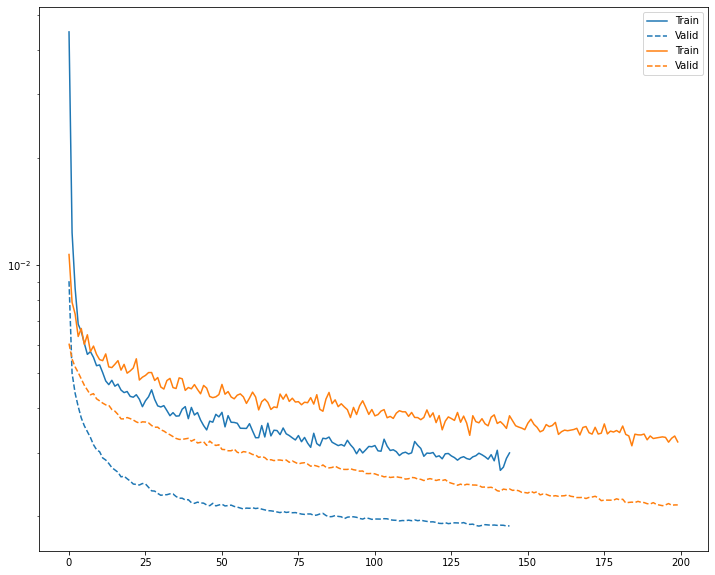

In [411]:
plot_history(history_model_wo_bias, 0)
plot_history(history_model_w_bias, 1)


In [412]:
history_model_w_bias.history.keys()

dict_keys(['loss', 'accuracy', 'recall', 'precision', 'auc', 'tp', 'tn', 'fp', 'fn', 'val_loss', 'val_accuracy', 'val_recall', 'val_precision', 'val_auc', 'val_tp', 'val_tn', 'val_fp', 'val_fn'])

------------ Model w/ bias
1425/1425 [==============================] - 2s 2ms/step - loss: 0.0021 - accuracy: 0.9994 - recall: 0.6462 - precision: 0.9333 - auc: 0.9613 - tp: 42.0000 - tn: 45501.0000 - fp: 3.0000 - fn: 23.0000
 Model w/ bias
loss : 0.002145141363143921
accuracy : 0.99942946434021
recall : 0.6461538672447205
precision : 0.9333333373069763
auc : 0.9612840414047241
tp : 42.0
tn : 45501.0
fp : 3.0
fn : 23.0
f1 : 0.7636363796951355
roc auc:  0.9927096857081034
Confusion matrix:
[[45501     3]
 [   23    42]]
------------ Model w/o bias
1425/1425 [==============================] - 2s 2ms/step - loss: 0.0019 - accuracy: 0.9994 - recall: 0.7692 - precision: 0.8197 - auc: 0.9613 - tp: 50.0000 - tn: 45493.0000 - fp: 11.0000 - fn: 15.0000
Model w/o bias
loss : 0.0018721172818914056
accuracy : 0.99942946434021
recall : 0.7692307829856873
precision : 0.8196721076965332
auc : 0.9612794518470764
tp : 50.0
tn : 45493.0
fp : 11.0
fn : 15.0
f1 : 0.793650789979003
roc auc:  0.99417532186

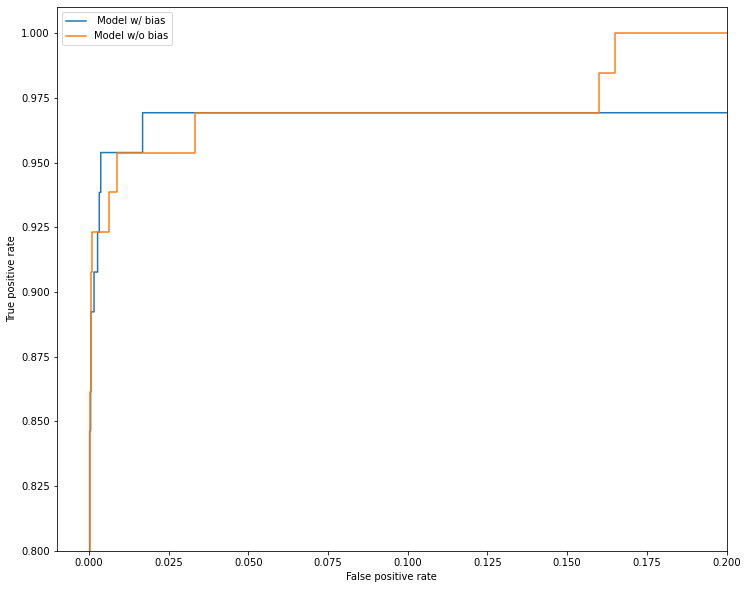

In [413]:
def evaluate_model(model, title=None):
    evaluation = model.evaluate(valid_features, valid_labels)
    if(title):
        print(title)
    eval_dict = {}
    for key, value in zip(model.metrics_names, evaluation):
        eval_dict[key] = value
        print(key, ":", value)

    print("f1 :", 2 * eval_dict['recall'] * eval_dict['precision'] / (eval_dict['recall'] + eval_dict['precision']))

    predict_proba = model.predict_proba(valid_features)
    print("roc auc: ", sklearn.metrics.roc_auc_score(valid_labels, predict_proba))
    fpr, tpr, threshold = sklearn.metrics.roc_curve(valid_labels, predict_proba)

    conf_mx = sklearn.metrics.confusion_matrix(valid_labels, predict_proba > 0.5)
    print("Confusion matrix:")
    print(conf_mx)
#     sns.heatmap(conf_mx)

    plt.plot(fpr, tpr, label=title)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.xlim([-0.01, 0.2])
    plt.ylim([0.8, 1.01])
    plt.legend()
    
    
print("------------ Model w/ bias")
evaluate_model(model_w_bias, title=" Model w/ bias")
print("------------ Model w/o bias")
evaluate_model(model_wo_bias, title = "Model w/o bias")


In [414]:
class_weight = {1: 1/(pos/(pos+neg))/2, 0: 1/(neg/(pos+neg))/2}
class_weight

{1: 289.4380081300813, 0: 0.5008652375006595}

In [415]:
model_w_bias_weights = BuildModel(output_bias=np.log(pos/neg))

keras.utils.plot_model(model_w_bias_weights, show_shapes=True)
# model_wo_bias.summary()

model_w_bias_weights.compile(loss="binary_crossentropy", optimizer="adam", metrics=[METRICS])

model_w_bias_weights.evaluate(train_features[:10], train_labels[:10])

history_model_w_bias_class_weight  = model_w_bias_weights.fit (train_features, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(valid_features, valid_labels), callbacks=[callback_early_stopping], class_weight=class_weight)

use bias: -6.359359340922742
1/1 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.9994 - recall: 0.7692 - precision: 0.8197 - auc: 0.9613 - tp: 50.0000 - tn: 45503.0000 - fp: 11.0000 - fn: 15.0000
Epoch 1/200
2849/2849 [==============================] - 10s 3ms/step - loss: 1.0821 - accuracy: 0.9782 - recall: 0.7853 - precision: 0.0616 - auc: 0.9063 - tp: 256.0000 - tn: 178053.0000 - fp: 3897.0000 - fn: 70.0000 - val_loss: 0.0823 - val_accuracy: 0.9818 - val_recall: 0.9538 - val_precision: 0.0697 - val_auc: 0.9915 - val_tp: 62.0000 - val_tn: 44676.0000 - val_fp: 828.0000 - val_fn: 3.0000
Epoch 2/200
2849/2849 [==============================] - 10s 3ms/step - loss: 0.3294 - accuracy: 0.9589 - recall: 0.8865 - precision: 0.0373 - auc: 0.9533 - tp: 289.0000 - tn: 174497.0000 - fp: 7453.0000 - fn: 37.0000 - val_loss: 0.0679 - val_accuracy: 0.9842 - val_recall: 0.9538 - val_precision: 0.0796 - val_auc: 0.9903 - val_tp: 62.0000 - val_tn: 44787.0000 - val_fp: 717.00

In [416]:
model_wo_bias_weights = BuildModel()

keras.utils.plot_model(model_wo_bias_weights, show_shapes=True)
# model_wo_bias_weights.summary()

model_wo_bias_weights.compile(loss="binary_crossentropy", optimizer="adam", metrics=[METRICS])

model_wo_bias_weights.evaluate(valid_features, valid_labels)

history_model_wo_bias_class_weight = model_wo_bias_weights.fit(train_features, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(valid_features, valid_labels), callbacks=[callback_early_stopping], class_weight=class_weight)


1425/1425 [==============================] - 2s 2ms/step - loss: 0.3788 - accuracy: 0.9959 - recall: 0.5308 - precision: 0.1816 - auc: 0.8967 - tp: 69.0000 - tn: 90697.0000 - fp: 311.0000 - fn: 61.0000
Epoch 1/200
2849/2849 [==============================] - 10s 3ms/step - loss: 1.0650 - accuracy: 0.9637 - recall: 0.7515 - precision: 0.0361 - auc: 0.8988 - tp: 245.0000 - tn: 175413.0000 - fp: 6537.0000 - fn: 81.0000 - val_loss: 0.0340 - val_accuracy: 0.9950 - val_recall: 0.8923 - val_precision: 0.2071 - val_auc: 0.9790 - val_tp: 58.0000 - val_tn: 45282.0000 - val_fp: 222.0000 - val_fn: 7.0000
Epoch 2/200
2849/2849 [==============================] - 10s 3ms/step - loss: 0.4190 - accuracy: 0.9174 - recall: 0.8681 - precision: 0.0185 - auc: 0.9441 - tp: 283.0000 - tn: 166937.0000 - fp: 15013.0000 - fn: 43.0000 - val_loss: 0.0839 - val_accuracy: 0.9798 - val_recall: 0.9385 - val_precision: 0.0625 - val_auc: 0.9930 - val_tp: 61.0000 - val_tn: 44589.0000 - val_fp: 915.0000 - val_fn: 4.0000
E

------------ Model w/ bias +weights
1425/1425 [==============================] - 2s 2ms/step - loss: 0.0243 - accuracy: 0.9985 - recall: 0.8308 - precision: 0.4821 - auc: 0.9530 - tp: 54.0000 - tn: 45446.0000 - fp: 58.0000 - fn: 11.0000
Model w/ bias +weights
loss : 0.024342752993106842
accuracy : 0.998485803604126
recall : 0.8307692408561707
precision : 0.4821428656578064
auc : 0.9530180096626282
tp : 54.0
tn : 45446.0
fp : 58.0
fn : 11.0
f1 : 0.6101695010647543
roc auc:  0.9834476090014066
Confusion matrix:
[[45446    58]
 [   11    54]]
------------ Model w/o bias +weights
1425/1425 [==============================] - 2s 2ms/step - loss: 0.0334 - accuracy: 0.9942 - recall: 0.9231 - precision: 0.1881 - auc: 0.9883 - tp: 60.0000 - tn: 45245.0000 - fp: 259.0000 - fn: 5.0000
Model w/o bias +weights
loss : 0.03335988521575928
accuracy : 0.9942066073417664
recall : 0.9230769276618958
precision : 0.18808777630329132
auc : 0.9883169531822205
tp : 60.0
tn : 45245.0
fp : 259.0
fn : 5.0
f1 : 0.

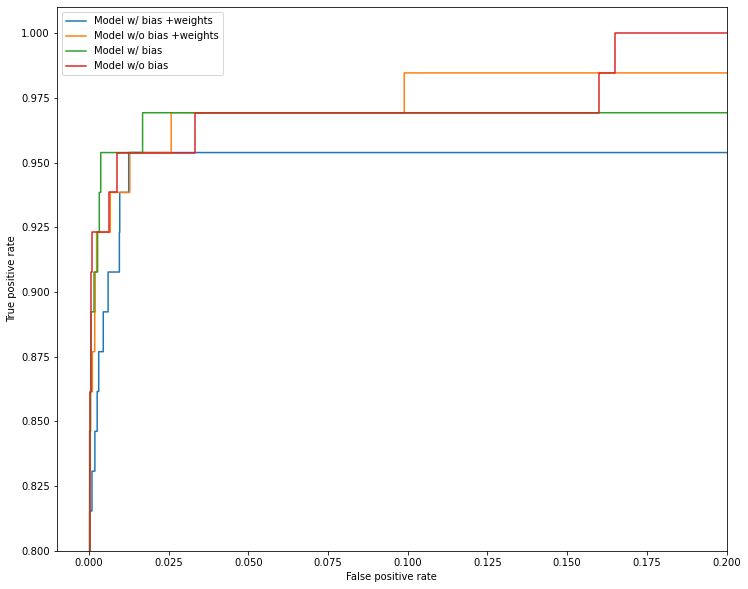

In [417]:
print("------------ Model w/ bias +weights")
evaluate_model(model_w_bias_weights, "Model w/ bias +weights")
print("------------ Model w/o bias +weights")
evaluate_model(model_wo_bias_weights, "Model w/o bias +weights")

print("------------ Model w/ bias")
evaluate_model(model_w_bias, "Model w/ bias")
print("------------ Model w/o bias")
evaluate_model(model_wo_bias, "Model w/o bias")


In [418]:
def make_pos_neg_ds(train_features, train_labels):
    pos_features = train_features[train_labels == 1]
    pos_labels = train_labels[train_labels == 1]
    neg_features = train_features[train_labels == 0]
    neg_labels = train_labels[train_labels == 0]

    pos_ds = tf.data.Dataset.from_tensor_slices((pos_features, pos_labels)).repeat(len(neg_features) // len(pos_features))
    neg_ds = tf.data.Dataset.from_tensor_slices((neg_features, neg_labels))

    result_ds = tf.data.experimental.sample_from_datasets([neg_ds, pos_ds], weights=[0.5, 0.5]).batch(BATCH_SIZE, drop_remainder=True)
    
    return result_ds
    
sampled_ds = make_pos_neg_ds(train_features, train_labels)
valid_ds = tf.data.Dataset.from_tensor_slices((valid_features, valid_labels)).batch(BATCH_SIZE, drop_remainder=True)

In [419]:
model_wo_bias_sampled = BuildModel()

keras.utils.plot_model(model_wo_bias_sampled, show_shapes=True)
# model_wo_bias_sampled.summary()

model_wo_bias_sampled.compile(loss="binary_crossentropy", optimizer="adam", metrics=[METRICS])

# model_wo_bias_sampled.evaluate(valid_features, valid_labels)

history_model_wo_bias_sampled = model_wo_bias_sampled.fit(sampled_ds, epochs=EPOCHS, validation_data=(valid_ds), callbacks=[callback_early_stopping])


Epoch 1/200
5685/5685 [==============================] - 20s 3ms/step - loss: 0.0476 - accuracy: 0.9850 - recall: 0.9812 - precision: 0.9851 - auc: 0.9987 - tp: 178559.0000 - tn: 224728.0000 - fp: 2708.0000 - fn: 3414.0000 - val_loss: 0.0118 - val_accuracy: 0.9966 - val_recall: 0.9538 - val_precision: 0.2870 - val_auc: 0.9763 - val_tp: 62.0000 - val_tn: 45349.0000 - val_fp: 154.0000 - val_fn: 3.0000
Epoch 2/200
5685/5685 [==============================] - 20s 3ms/step - loss: 0.0116 - accuracy: 0.9971 - recall: 0.9988 - precision: 0.9955 - auc: 0.9996 - tp: 181681.0000 - tn: 181110.0000 - fp: 822.0000 - fn: 227.0000 - val_loss: 0.0104 - val_accuracy: 0.9975 - val_recall: 0.9538 - val_precision: 0.3605 - val_auc: 0.9765 - val_tp: 62.0000 - val_tn: 45393.0000 - val_fp: 110.0000 - val_fn: 3.0000
Epoch 3/200
5685/5685 [==============================] - 20s 3ms/step - loss: 0.0086 - accuracy: 0.9981 - recall: 0.9990 - precision: 0.9971 - auc: 0.9996 - tp: 181726.0000 - tn: 181406.0000 - fp:

In [420]:
model_w_bias_sampled = BuildModel(output_bias=np.log(pos/neg))

# keras.utils.plot_model(model_w_bias_sampled, show_shapes=True)
# model_wo_bias.summary()

model_w_bias_sampled.compile(loss="binary_crossentropy", optimizer="adam", metrics=[METRICS])

model_w_bias_sampled.evaluate(train_features[:10], train_labels[:10])

history_model_w_bias_sampled = model_w_bias_sampled.fit(sampled_ds, epochs=EPOCHS, validation_data=(valid_ds), callbacks=[callback_early_stopping], class_weight=class_weight)


use bias: -6.359359340922742
1/1 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 0.9989 - recall: 0.8462 - precision: 0.5851 - auc: 0.9536 - tp: 55.0000 - tn: 45474.0000 - fp: 39.0000 - fn: 10.0000
Epoch 1/200
5685/5685 [==============================] - 24s 4ms/step - loss: 1.5933 - accuracy: 0.7304 - recall: 0.9982 - precision: 0.6501 - auc: 0.9239 - tp: 181575.0000 - tn: 84183.0000 - fp: 97749.0000 - fn: 333.0000 - val_loss: 1.0156 - val_accuracy: 0.7932 - val_recall: 0.9846 - val_precision: 0.0067 - val_auc: 0.9628 - val_tp: 64.0000 - val_tn: 36081.0000 - val_fp: 9422.0000 - val_fn: 1.0000
Epoch 2/200
5685/5685 [==============================] - 21s 4ms/step - loss: 0.3266 - accuracy: 0.8997 - recall: 0.9999 - precision: 0.8330 - auc: 0.9700 - tp: 181898.0000 - tn: 145464.0000 - fp: 36468.0000 - fn: 10.0000 - val_loss: 0.4193 - val_accuracy: 0.9210 - val_recall: 0.9846 - val_precision: 0.0175 - val_auc: 0.9767 - val_tp: 64.0000 - val_tn: 41905.0000 - val_f

Epoch 21/200
5685/5685 [==============================] - 21s 4ms/step - loss: 0.0432 - accuracy: 0.9964 - recall: 1.0000 - precision: 0.9928 - auc: 0.9991 - tp: 181902.0000 - tn: 180618.0000 - fp: 1314.0000 - fn: 6.0000 - val_loss: 0.0283 - val_accuracy: 0.9987 - val_recall: 0.8769 - val_precision: 0.5278 - val_auc: 0.9750 - val_tp: 57.0000 - val_tn: 45452.0000 - val_fp: 51.0000 - val_fn: 8.0000
Epoch 22/200
5685/5685 [==============================] - 20s 4ms/step - loss: 0.0384 - accuracy: 0.9965 - recall: 0.9999 - precision: 0.9932 - auc: 0.9991 - tp: 181898.0000 - tn: 180679.0000 - fp: 1253.0000 - fn: 10.0000 - val_loss: 0.0317 - val_accuracy: 0.9987 - val_recall: 0.8615 - val_precision: 0.5385 - val_auc: 0.9949 - val_tp: 56.0000 - val_tn: 45455.0000 - val_fp: 48.0000 - val_fn: 9.0000
Epoch 23/200
5685/5685 [==============================] - 20s 4ms/step - loss: 0.0389 - accuracy: 0.9957 - recall: 1.0000 - precision: 0.9914 - auc: 0.9991 - tp: 181899.0000 - tn: 180361.0000 - fp: 1

5685/5685 [==============================] - 20s 4ms/step - loss: 0.0414 - accuracy: 0.9906 - recall: 1.0000 - precision: 0.9816 - auc: 0.9983 - tp: 181904.0000 - tn: 178528.0000 - fp: 3404.0000 - fn: 4.0000 - val_loss: 0.0127 - val_accuracy: 0.9990 - val_recall: 0.8462 - val_precision: 0.6111 - val_auc: 0.9678 - val_tp: 55.0000 - val_tn: 45468.0000 - val_fp: 35.0000 - val_fn: 10.0000
Epoch 42/200
5685/5685 [==============================] - 21s 4ms/step - loss: 0.0374 - accuracy: 0.9919 - recall: 1.0000 - precision: 0.9842 - auc: 0.9987 - tp: 181901.0000 - tn: 179006.0000 - fp: 2926.0000 - fn: 7.0000 - val_loss: 0.0103 - val_accuracy: 0.9991 - val_recall: 0.8462 - val_precision: 0.6322 - val_auc: 0.9680 - val_tp: 55.0000 - val_tn: 45471.0000 - val_fp: 32.0000 - val_fn: 10.0000
Epoch 43/200
5685/5685 [==============================] - 20s 4ms/step - loss: 0.0238 - accuracy: 0.9932 - recall: 1.0000 - precision: 0.9866 - auc: 0.9992 - tp: 181902.0000 - tn: 179470.0000 - fp: 2462.0000 - f

5685/5685 [==============================] - 21s 4ms/step - loss: 0.0226 - accuracy: 0.9943 - recall: 1.0000 - precision: 0.9887 - auc: 0.9991 - tp: 181904.0000 - tn: 179847.0000 - fp: 2085.0000 - fn: 4.0000 - val_loss: 0.0069 - val_accuracy: 0.9992 - val_recall: 0.8462 - val_precision: 0.6790 - val_auc: 0.9532 - val_tp: 55.0000 - val_tn: 45477.0000 - val_fp: 26.0000 - val_fn: 10.0000
Epoch 62/200
5685/5685 [==============================] - 20s 4ms/step - loss: 0.0199 - accuracy: 0.9940 - recall: 1.0000 - precision: 0.9882 - auc: 0.9992 - tp: 181902.0000 - tn: 179754.0000 - fp: 2178.0000 - fn: 6.0000 - val_loss: 0.0083 - val_accuracy: 0.9991 - val_recall: 0.8462 - val_precision: 0.6250 - val_auc: 0.9675 - val_tp: 55.0000 - val_tn: 45470.0000 - val_fp: 33.0000 - val_fn: 10.0000
Epoch 63/200
5685/5685 [==============================] - 22s 4ms/step - loss: 0.0183 - accuracy: 0.9944 - recall: 1.0000 - precision: 0.9889 - auc: 0.9992 - tp: 181904.0000 - tn: 179891.0000 - fp: 2041.0000 - f

5685/5685 [==============================] - 19s 3ms/step - loss: 0.0393 - accuracy: 0.9921 - recall: 1.0000 - precision: 0.9844 - auc: 0.9982 - tp: 181901.0000 - tn: 179051.0000 - fp: 2881.0000 - fn: 7.0000 - val_loss: 0.0057 - val_accuracy: 0.9992 - val_recall: 0.8308 - val_precision: 0.6750 - val_auc: 0.9606 - val_tp: 54.0000 - val_tn: 45477.0000 - val_fp: 26.0000 - val_fn: 11.0000
Epoch 82/200
5685/5685 [==============================] - 20s 3ms/step - loss: 0.0334 - accuracy: 0.9929 - recall: 1.0000 - precision: 0.9860 - auc: 0.9987 - tp: 181903.0000 - tn: 179356.0000 - fp: 2576.0000 - fn: 5.0000 - val_loss: 0.0065 - val_accuracy: 0.9992 - val_recall: 0.8308 - val_precision: 0.6923 - val_auc: 0.9531 - val_tp: 54.0000 - val_tn: 45479.0000 - val_fp: 24.0000 - val_fn: 11.0000
Epoch 83/200
5685/5685 [==============================] - 19s 3ms/step - loss: 0.0288 - accuracy: 0.9925 - recall: 1.0000 - precision: 0.9853 - auc: 0.9986 - tp: 181902.0000 - tn: 179227.0000 - fp: 2705.0000 - f

------------ Model w/ bias
1425/1425 [==============================] - 2s 2ms/step - loss: 0.0021 - accuracy: 0.9994 - recall: 0.6462 - precision: 0.9333 - auc: 0.9613 - tp: 42.0000 - tn: 45501.0000 - fp: 3.0000 - fn: 23.0000
Model w/ bias
loss : 0.002145141363143921
accuracy : 0.99942946434021
recall : 0.6461538672447205
precision : 0.9333333373069763
auc : 0.9612840414047241
tp : 42.0
tn : 45501.0
fp : 3.0
fn : 23.0
f1 : 0.7636363796951355
roc auc:  0.9927096857081034
Confusion matrix:
[[45501     3]
 [   23    42]]
------------ Model w/o bias
1425/1425 [==============================] - 2s 2ms/step - loss: 0.0019 - accuracy: 0.9994 - recall: 0.7692 - precision: 0.8197 - auc: 0.9613 - tp: 50.0000 - tn: 45493.0000 - fp: 11.0000 - fn: 15.0000
Model w/o bias
loss : 0.0018721172818914056
accuracy : 0.99942946434021
recall : 0.7692307829856873
precision : 0.8196721076965332
auc : 0.9612794518470764
tp : 50.0
tn : 45493.0
fp : 11.0
fn : 15.0
f1 : 0.793650789979003
roc auc:  0.994175321865

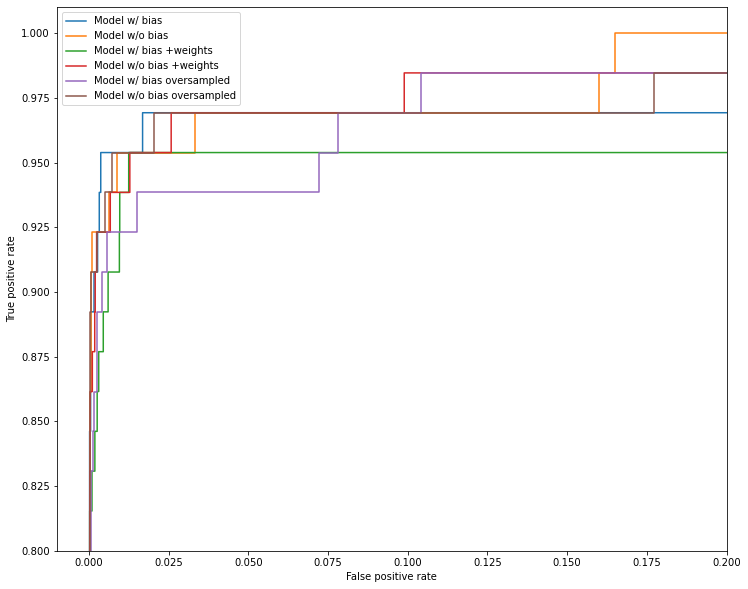

In [421]:
print("------------ Model w/ bias")
evaluate_model(model_w_bias, "Model w/ bias")
print("------------ Model w/o bias")
evaluate_model(model_wo_bias, "Model w/o bias")

print("------------ Model w/ bias +weights")
evaluate_model(model_w_bias_weights, "Model w/ bias +weights")
print("------------ Model w/o bias +weights")
evaluate_model(model_wo_bias_weights, "Model w/o bias +weights")

print("------------ Model w/ bias oversampled")
evaluate_model(model_w_bias_sampled, "Model w/ bias oversampled")
print("------------ Model w/o bias oversampled")
evaluate_model(model_wo_bias_sampled, "Model w/o bias oversampled")

